# Predicting Intrest rate based on Loan Characteristics

In [2]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

In [3]:
df = pd.read_csv('LoansData.csv')

In [5]:
df.head()

,LoanID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,1,20000.0,20000.0,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,2,19200.0,19200.0,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,3,35000.0,35000.0,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
3,4,10000.0,9975.0,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
4,5,12000.0,12000.0,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   LoanID                          2500 non-null   int64  
 1   Amount.Requested                2499 non-null   float64
 2   Amount.Funded.By.Investors      2499 non-null   float64
 3   Interest.Rate                   2498 non-null   object 
 4   Loan.Length                     2500 non-null   object 
 5   Loan.Purpose                    2500 non-null   object 
 6   Debt.To.Income.Ratio            2499 non-null   object 
 7   State                           2500 non-null   object 
 8   Home.Ownership                  2499 non-null   object 
 9   Monthly.Income                  2499 non-null   float64
 10  FICO.Range                      2498 non-null   object 
 11  Open.CREDIT.Lines               2497 non-null   float64
 12  Revolving.CREDIT.Balance        24

In [8]:
df.columns

Index(['LoanID', 'Amount.Requested', 'Amount.Funded.By.Investors',
       'Interest.Rate', 'Loan.Length', 'Loan.Purpose', 'Debt.To.Income.Ratio',
       'State', 'Home.Ownership', 'Monthly.Income', 'FICO.Range',
       'Open.CREDIT.Lines', 'Revolving.CREDIT.Balance',
       'Inquiries.in.the.Last.6.Months', 'Employment.Length'],
      dtype='object')

In [162]:
#Data Related issues

# naming convention of variables
# Mismatch in data types
# Some variables having high correlations
# some variable are unique in nature
# Some variables are having missings - imputation of msisings
# some variables having outliers
# Some of variables are categoriecal - need to be converted in to numerical using encoding
# some variables are having less variance

In [9]:
# column names contain dot in them . we will replace them with "_"

In [12]:
df.columns = [col.replace('.','_')for col in df.columns]

In [13]:
df.columns

Index(['LoanID', 'Amount_Requested', 'Amount_Funded_By_Investors',
       'Interest_Rate', 'Loan_Length', 'Loan_Purpose', 'Debt_To_Income_Ratio',
       'State', 'Home_Ownership', 'Monthly_Income', 'FICO_Range',
       'Open_CREDIT_Lines', 'Revolving_CREDIT_Balance',
       'Inquiries_in_the_Last_6_Months', 'Employment_Length'],
      dtype='object')

In [20]:
df['Interest_Rate']= df.Interest_Rate.apply(lambda x : float(str(x).replace('%','')))

In [22]:
df.Interest_Rate.head()

0     8.90
1    12.12
2    21.98
3     9.99
4    11.71
Name: Interest_Rate, dtype: float64

In [29]:
df.Loan_Length.head()

0    36 months
1    36 months
2    60 months
3    36 months
4    36 months
Name: Loan_Length, dtype: object

In [31]:
df['Loan_Length']=df.Loan_Length.apply(lambda x : float(str(x).replace('months','')))

In [32]:
df.Loan_Length.head()

0    36.0
1    36.0
2    60.0
3    36.0
4    36.0
Name: Loan_Length, dtype: float64

In [34]:
df.Employment_Length

0        < 1 year
1         2 years
2         2 years
3         5 years
4         9 years
          ...    
2495      8 years
2496    10+ years
2497    10+ years
2498      5 years
2499    10+ years
Name: Employment_Length, Length: 2500, dtype: object

In [35]:
df['Employment_Length']= df.Employment_Length.apply(lambda x : float(str(x).replace('years','').replace(' year','').replace('< ','').replace('+','')))

In [36]:
df.Employment_Length

0        1.0
1        2.0
2        2.0
3        5.0
4        9.0
        ... 
2495     8.0
2496    10.0
2497    10.0
2498     5.0
2499    10.0
Name: Employment_Length, Length: 2500, dtype: float64

In [37]:
df.Debt_To_Income_Ratio

0       14.90%
1       28.36%
2       23.81%
3       14.30%
4       18.78%
         ...  
2495    19.23%
2496    21.54%
2497     4.89%
2498    16.66%
2499     6.76%
Name: Debt_To_Income_Ratio, Length: 2500, dtype: object

In [38]:
df['Debt_To_Income_Ratio'] = df.Debt_To_Income_Ratio.apply(lambda x : float(str(x).replace('%','')))

In [39]:
df.Debt_To_Income_Ratio

0       14.90
1       28.36
2       23.81
3       14.30
4       18.78
        ...  
2495    19.23
2496    21.54
2497     4.89
2498    16.66
2499     6.76
Name: Debt_To_Income_Ratio, Length: 2500, dtype: float64

In [40]:
df.FICO_Range

0       735-739
1       715-719
2       690-694
3       695-699
4       695-699
         ...   
2495    705-709
2496    740-744
2497    680-684
2498    675-679
2499    670-674
Name: FICO_Range, Length: 2500, dtype: object

In [41]:
df.FICO_Range.str.split('-',expand=True)[0]

0       735
1       715
2       690
3       695
4       695
       ... 
2495    705
2496    740
2497    680
2498    675
2499    670
Name: 0, Length: 2500, dtype: object

In [42]:
df.FICO_Range.str.split('-',expand=True)[1]

0       739
1       719
2       694
3       699
4       699
       ... 
2495    709
2496    744
2497    684
2498    679
2499    674
Name: 1, Length: 2500, dtype: object

In [44]:
df['FICO_SCORE'] = (df.FICO_Range.str.split('-',expand=True)[0].astype(float)+df.FICO_Range.str.split('-',expand=True)[1].astype(float))/2

In [45]:
df['FICO_SCORE']

0       737.0
1       717.0
2       692.0
3       697.0
4       697.0
        ...  
2495    707.0
2496    742.0
2497    682.0
2498    677.0
2499    672.0
Name: FICO_SCORE, Length: 2500, dtype: float64

In [46]:
df

,LoanID,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,FICO_SCORE
0,1,20000.0,20000.00,8.90,36.0,debt_consolidation,14.90,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,1.0,737.0
1,2,19200.0,19200.00,12.12,36.0,debt_consolidation,28.36,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2.0,717.0
2,3,35000.0,35000.00,21.98,60.0,debt_consolidation,23.81,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2.0,692.0
3,4,10000.0,9975.00,9.99,36.0,debt_consolidation,14.30,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5.0,697.0
4,5,12000.0,12000.00,11.71,36.0,credit_card,18.78,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9.0,697.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2496,30000.0,29950.00,16.77,60.0,debt_consolidation,19.23,NY,MORTGAGE,9250.00,705-709,15.0,45880.0,1.0,8.0,707.0
2496,2497,16000.0,16000.00,14.09,60.0,home_improvement,21.54,MD,OWN,8903.25,740-744,18.0,18898.0,1.0,10.0,742.0
2497,2498,10000.0,10000.00,13.99,36.0,debt_consolidation,4.89,PA,MORTGAGE,2166.67,680-684,4.0,4544.0,0.0,10.0,682.0
2498,2499,6000.0,6000.00,12.42,36.0,major_purchase,16.66,NJ,RENT,3500.00,675-679,8.0,7753.0,0.0,5.0,677.0


In [47]:
df1 = df.drop(columns=['FICO_Range', 'Amount_Funded_By_Investors', 'LoanID', 'State'], axis=1)

In [48]:
df1

,Amount_Requested,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,Home_Ownership,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,FICO_SCORE
0,20000.0,8.90,36.0,debt_consolidation,14.90,MORTGAGE,6541.67,14.0,14272.0,2.0,1.0,737.0
1,19200.0,12.12,36.0,debt_consolidation,28.36,MORTGAGE,4583.33,12.0,11140.0,1.0,2.0,717.0
2,35000.0,21.98,60.0,debt_consolidation,23.81,MORTGAGE,11500.00,14.0,21977.0,1.0,2.0,692.0
3,10000.0,9.99,36.0,debt_consolidation,14.30,MORTGAGE,3833.33,10.0,9346.0,0.0,5.0,697.0
4,12000.0,11.71,36.0,credit_card,18.78,RENT,3195.00,11.0,14469.0,0.0,9.0,697.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2495,30000.0,16.77,60.0,debt_consolidation,19.23,MORTGAGE,9250.00,15.0,45880.0,1.0,8.0,707.0
2496,16000.0,14.09,60.0,home_improvement,21.54,OWN,8903.25,18.0,18898.0,1.0,10.0,742.0
2497,10000.0,13.99,36.0,debt_consolidation,4.89,MORTGAGE,2166.67,4.0,4544.0,0.0,10.0,682.0
2498,6000.0,12.42,36.0,major_purchase,16.66,RENT,3500.00,8.0,7753.0,0.0,5.0,677.0


In [49]:
def missing_treat(x):
    if ((x.dtype =='float')or (x.dtype=='int')):
        x=x.fillna(x.median())
    elif x.dtype =='object':
        x = x.fillna(x.mode)
    else :
        x
    return (x)
    
        

In [61]:
df1=df1.apply(missing_treat)
df1

,Amount_Requested,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,Home_Ownership,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,FICO_SCORE
0,20000.0,8.90,36.0,debt_consolidation,14.90,MORTGAGE,6541.67,14.0,14272.0,2.0,1.0,737.0
1,19200.0,12.12,36.0,debt_consolidation,28.36,MORTGAGE,4583.33,12.0,11140.0,1.0,2.0,717.0
2,35000.0,21.98,60.0,debt_consolidation,23.81,MORTGAGE,11500.00,14.0,21977.0,1.0,2.0,692.0
3,10000.0,9.99,36.0,debt_consolidation,14.30,MORTGAGE,3833.33,10.0,9346.0,0.0,5.0,697.0
4,12000.0,11.71,36.0,credit_card,18.78,RENT,3195.00,11.0,14469.0,0.0,9.0,697.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2495,30000.0,16.77,60.0,debt_consolidation,19.23,MORTGAGE,9250.00,15.0,45880.0,1.0,8.0,707.0
2496,16000.0,14.09,60.0,home_improvement,21.54,OWN,8903.25,18.0,18898.0,1.0,10.0,742.0
2497,10000.0,13.99,36.0,debt_consolidation,4.89,MORTGAGE,2166.67,4.0,4544.0,0.0,10.0,682.0
2498,6000.0,12.42,36.0,major_purchase,16.66,RENT,3500.00,8.0,7753.0,0.0,5.0,677.0


In [55]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount_Requested                2499 non-null   float64
 1   Interest_Rate                   2498 non-null   float64
 2   Loan_Length                     2500 non-null   float64
 3   Loan_Purpose                    2500 non-null   object 
 4   Debt_To_Income_Ratio            2499 non-null   float64
 5   Home_Ownership                  2499 non-null   object 
 6   Monthly_Income                  2499 non-null   float64
 7   Open_CREDIT_Lines               2497 non-null   float64
 8   Revolving_CREDIT_Balance        2497 non-null   float64
 9   Inquiries_in_the_Last_6_Months  2497 non-null   float64
 10  Employment_Length               2423 non-null   float64
 11  FICO_SCORE                      2498 non-null   float64
dtypes: float64(10), object(2)
memory u

In [56]:
def outlier_var(x):
    if ((x.dtype =='int') or (x.dtype =='float')):
        x=x.clip(lower=x.quantile(0.01),upper=x.quantile(0.99))
    else:
        x
    return (x)

In [58]:
df1=df1.apply(outlier_var)

In [59]:
df1

,Amount_Requested,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,Home_Ownership,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,FICO_SCORE
0,20000.0,8.90,36.0,debt_consolidation,14.90,MORTGAGE,6541.67,14.0,14272.0,2.0,1.0,737.0
1,19200.0,12.12,36.0,debt_consolidation,28.36,MORTGAGE,4583.33,12.0,11140.0,1.0,2.0,717.0
2,35000.0,21.98,60.0,debt_consolidation,23.81,MORTGAGE,11500.00,14.0,21977.0,1.0,2.0,692.0
3,10000.0,9.99,36.0,debt_consolidation,14.30,MORTGAGE,3833.33,10.0,9346.0,0.0,5.0,697.0
4,12000.0,11.71,36.0,credit_card,18.78,RENT,3195.00,11.0,14469.0,0.0,9.0,697.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2495,30000.0,16.77,60.0,debt_consolidation,19.23,MORTGAGE,9250.00,15.0,45880.0,1.0,8.0,707.0
2496,16000.0,14.09,60.0,home_improvement,21.54,OWN,8903.25,18.0,18898.0,1.0,10.0,742.0
2497,10000.0,13.99,36.0,debt_consolidation,4.89,MORTGAGE,2166.67,4.0,4544.0,0.0,10.0,682.0
2498,6000.0,12.42,36.0,major_purchase,16.66,RENT,3500.00,8.0,7753.0,0.0,5.0,677.0


In [62]:
df2 = pd.get_dummies?

In [65]:
df2 = pd.get_dummies(df1,columns =['Loan_Purpose','Home_Ownership'], drop_first= True)

In [66]:
df2

,Amount_Requested,Interest_Rate,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,FICO_SCORE,...,Loan_Purpose_other,Loan_Purpose_renewable_energy,Loan_Purpose_small_business,Loan_Purpose_vacation,Loan_Purpose_wedding,Home_Ownership_MORTGAGE,Home_Ownership_NONE,Home_Ownership_OTHER,Home_Ownership_OWN,Home_Ownership_RENT
0,20000.0,8.90,36.0,14.90,6541.67,14.0,14272.0,2.0,1.0,737.0,...,0,0,0,0,0,1,0,0,0,0
1,19200.0,12.12,36.0,28.36,4583.33,12.0,11140.0,1.0,2.0,717.0,...,0,0,0,0,0,1,0,0,0,0
2,35000.0,21.98,60.0,23.81,11500.00,14.0,21977.0,1.0,2.0,692.0,...,0,0,0,0,0,1,0,0,0,0
3,10000.0,9.99,36.0,14.30,3833.33,10.0,9346.0,0.0,5.0,697.0,...,0,0,0,0,0,1,0,0,0,0
4,12000.0,11.71,36.0,18.78,3195.00,11.0,14469.0,0.0,9.0,697.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,30000.0,16.77,60.0,19.23,9250.00,15.0,45880.0,1.0,8.0,707.0,...,0,0,0,0,0,1,0,0,0,0
2496,16000.0,14.09,60.0,21.54,8903.25,18.0,18898.0,1.0,10.0,742.0,...,0,0,0,0,0,0,0,0,1,0
2497,10000.0,13.99,36.0,4.89,2166.67,4.0,4544.0,0.0,10.0,682.0,...,0,0,0,0,0,1,0,0,0,0
2498,6000.0,12.42,36.0,16.66,3500.00,8.0,7753.0,0.0,5.0,677.0,...,0,0,0,0,0,0,0,0,0,1


In [68]:
df2.shape

(2500, 28)

In [69]:
def cv_value(x):
    return(x.std()/x.mean())
 
df2.apply(cv_value)  #if the variable having less than 0.5% CV  CV<0.005

Amount_Requested                    0.628328
Interest_Rate                       0.317569
Loan_Length                         0.240686
Debt_To_Income_Ratio                0.486328
Monthly_Income                      0.549859
Open_CREDIT_Lines                   0.435441
Revolving_CREDIT_Balance            0.999611
Inquiries_in_the_Last_6_Months      1.288087
Employment_Length                   0.618898
FICO_SCORE                          0.049090
Loan_Purpose_credit_card            2.152321
Loan_Purpose_debt_consolidation     0.955585
Loan_Purpose_educational           12.873731
Loan_Purpose_home_improvement       3.931100
Loan_Purpose_house                 11.137756
Loan_Purpose_major_purchase         4.874626
Loan_Purpose_medical                9.075587
Loan_Purpose_moving                 9.232605
Loan_Purpose_other                  3.382660
Loan_Purpose_renewable_energy      24.984989
Loan_Purpose_small_business         5.267517
Loan_Purpose_vacation              10.867146
Loan_Purpo

In [70]:
#Pdf - density fucntion
import seaborn as sns

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Interest_Rate', ylabel='Density'>

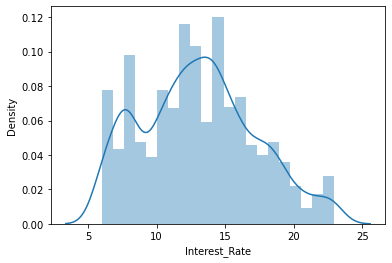

In [71]:
# Normality assumption - Checks

sns.distplot(df2.Interest_Rate)

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Interest_Rate', ylabel='Density'>

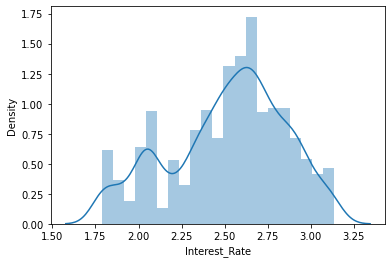

In [73]:
sns.distplot(np.log(df2.Interest_Rate))

In [74]:
df2['ln_Interest_Rate'] = np.log(df2.Interest_Rate)

In [75]:
df2

,Amount_Requested,Interest_Rate,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,FICO_SCORE,...,Loan_Purpose_renewable_energy,Loan_Purpose_small_business,Loan_Purpose_vacation,Loan_Purpose_wedding,Home_Ownership_MORTGAGE,Home_Ownership_NONE,Home_Ownership_OTHER,Home_Ownership_OWN,Home_Ownership_RENT,ln_Interest_Rate
0,20000.0,8.90,36.0,14.90,6541.67,14.0,14272.0,2.0,1.0,737.0,...,0,0,0,0,1,0,0,0,0,2.186051
1,19200.0,12.12,36.0,28.36,4583.33,12.0,11140.0,1.0,2.0,717.0,...,0,0,0,0,1,0,0,0,0,2.494857
2,35000.0,21.98,60.0,23.81,11500.00,14.0,21977.0,1.0,2.0,692.0,...,0,0,0,0,1,0,0,0,0,3.090133
3,10000.0,9.99,36.0,14.30,3833.33,10.0,9346.0,0.0,5.0,697.0,...,0,0,0,0,1,0,0,0,0,2.301585
4,12000.0,11.71,36.0,18.78,3195.00,11.0,14469.0,0.0,9.0,697.0,...,0,0,0,0,0,0,0,0,1,2.460443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,30000.0,16.77,60.0,19.23,9250.00,15.0,45880.0,1.0,8.0,707.0,...,0,0,0,0,1,0,0,0,0,2.819592
2496,16000.0,14.09,60.0,21.54,8903.25,18.0,18898.0,1.0,10.0,742.0,...,0,0,0,0,0,0,0,1,0,2.645465
2497,10000.0,13.99,36.0,4.89,2166.67,4.0,4544.0,0.0,10.0,682.0,...,0,0,0,0,1,0,0,0,0,2.638343
2498,6000.0,12.42,36.0,16.66,3500.00,8.0,7753.0,0.0,5.0,677.0,...,0,0,0,0,0,0,0,0,1,2.519308


In [163]:
#linearity check
corr_withy = df2.corrwith(df2.ln_Interest_Rate)
corr_withy

Amount_Requested                   0.301991
Interest_Rate                      0.982431
Loan_Length                        0.386342
Debt_To_Income_Ratio               0.178772
Monthly_Income                     0.014245
Open_CREDIT_Lines                  0.068331
Revolving_CREDIT_Balance           0.079789
Inquiries_in_the_Last_6_Months     0.177427
Employment_Length                  0.036027
FICO_SCORE                        -0.744196
Loan_Purpose_credit_card           0.005054
Loan_Purpose_debt_consolidation    0.133565
Loan_Purpose_educational          -0.036673
Loan_Purpose_home_improvement     -0.097748
Loan_Purpose_house                 0.003179
Loan_Purpose_major_purchase       -0.111812
Loan_Purpose_medical              -0.045235
Loan_Purpose_moving                0.009556
Loan_Purpose_other                 0.007845
Loan_Purpose_renewable_energy     -0.031531
Loan_Purpose_small_business       -0.011296
Loan_Purpose_vacation             -0.025117
Loan_Purpose_wedding            

In [164]:
corr_withy.to_csv('corr_withy1.csv')

In [167]:
vars = ['FICO_SCORE',
'Loan_Length',
'Amount_Requested',
'Debt_To_Income_Ratio',
'Inquiries_in_the_Last_6_Months',
'Loan_Purpose_debt_consolidation',
'Loan_Purpose_major_purchase',
'Loan_Purpose_home_improvement',
'Revolving_CREDIT_Balance'
]


In [168]:
vars

['FICO_SCORE',
 'Loan_Length',
 'Amount_Requested',
 'Debt_To_Income_Ratio',
 'Inquiries_in_the_Last_6_Months',
 'Loan_Purpose_debt_consolidation',
 'Loan_Purpose_major_purchase',
 'Loan_Purpose_home_improvement',
 'Revolving_CREDIT_Balance']

In [169]:
len(vars)

9

In [170]:
#multicollinearity check
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [171]:
#multico check for fico_score

In [172]:
variance_inflation_factor(df2[vars].values, 1) 

21.347869934867845

In [173]:
#multico check for Loan_Length

In [174]:
variance_inflation_factor(df2[vars].values, 2) 

4.994568713390312

In [175]:
# multi check for range of vars
[variance_inflation_factor(df2[vars].values, i) for i in range (0,9)]

[21.707124386941885,
 21.347869934867845,
 4.994568713390312,
 5.437426379000548,
 1.602640226504607,
 2.479464033924555,
 1.1296667389908222,
 1.1871720179845642,
 2.3851893266846975]

In [176]:
[variance_inflation_factor(df2[vars].values, i) for i in range (0,len(vars))]

[21.707124386941885,
 21.347869934867845,
 4.994568713390312,
 5.437426379000548,
 1.602640226504607,
 2.479464033924555,
 1.1296667389908222,
 1.1871720179845642,
 2.3851893266846975]

In [177]:
pd.Series([variance_inflation_factor(df2[vars].values, i) for i in range (0,len(vars))])

0    21.707124
1    21.347870
2     4.994569
3     5.437426
4     1.602640
5     2.479464
6     1.129667
7     1.187172
8     2.385189
dtype: float64

In [178]:
pd.Series(vars)

0                         FICO_SCORE
1                        Loan_Length
2                   Amount_Requested
3               Debt_To_Income_Ratio
4     Inquiries_in_the_Last_6_Months
5    Loan_Purpose_debt_consolidation
6        Loan_Purpose_major_purchase
7      Loan_Purpose_home_improvement
8           Revolving_CREDIT_Balance
dtype: object

In [179]:
vif = pd.concat([pd.Series(vars),pd.Series([variance_inflation_factor(df2[vars].values, i) for i in range (0,len(vars))])],axis=1)

In [180]:
vif.columns=['vars','vif']

In [181]:
vif

,vars,vif
0,FICO_SCORE,21.707124
1,Loan_Length,21.347870
2,Amount_Requested,4.994569
3,Debt_To_Income_Ratio,5.437426
4,Inquiries_in_the_Last_6_Months,1.602640
5,Loan_Purpose_debt_consolidation,2.479464
6,Loan_Purpose_major_purchase,1.129667
7,Loan_Purpose_home_improvement,1.187172
8,Revolving_CREDIT_Balance,2.385189


In [182]:
vif.sort_values(by='vif',ascending = False)

,vars,vif
0,FICO_SCORE,21.707124
1,Loan_Length,21.347870
3,Debt_To_Income_Ratio,5.437426
2,Amount_Requested,4.994569
5,Loan_Purpose_debt_consolidation,2.479464
8,Revolving_CREDIT_Balance,2.385189
4,Inquiries_in_the_Last_6_Months,1.602640
7,Loan_Purpose_home_improvement,1.187172
6,Loan_Purpose_major_purchase,1.129667


In [183]:
df2[vars].corr()

,FICO_SCORE,Loan_Length,Amount_Requested,Debt_To_Income_Ratio,Inquiries_in_the_Last_6_Months,Loan_Purpose_debt_consolidation,Loan_Purpose_major_purchase,Loan_Purpose_home_improvement,Revolving_CREDIT_Balance
FICO_SCORE,1.000000,0.011664,0.081684,-0.218758,-0.088956,-0.113854,0.116514,0.145066,-0.010875
Loan_Length,0.011664,1.000000,0.412678,0.025450,0.031553,0.062923,-0.020326,0.051311,0.080894
Amount_Requested,0.081684,0.412678,1.000000,0.082025,-0.022045,0.191563,-0.111110,0.020501,0.342755
Debt_To_Income_Ratio,-0.218758,0.025450,0.082025,1.000000,0.012432,0.126753,-0.112140,-0.098786,0.219636
Inquiries_in_the_Last_6_Months,-0.088956,0.031553,-0.022045,0.012432,1.000000,-0.010891,0.004402,0.045849,-0.018271
Loan_Purpose_debt_consolidation,-0.113854,0.062923,0.191563,0.126753,-0.010891,1.000000,-0.214765,-0.266312,0.049599
Loan_Purpose_major_purchase,0.116514,-0.020326,-0.111110,-0.112140,0.004402,-0.214765,1.000000,-0.052206,-0.068910
Loan_Purpose_home_improvement,0.145066,0.051311,0.020501,-0.098786,0.045849,-0.266312,-0.052206,1.000000,-0.027629
Revolving_CREDIT_Balance,-0.010875,0.080894,0.342755,0.219636,-0.018271,0.049599,-0.068910,-0.027629,1.000000


In [184]:
vars = ['FICO_SCORE',
#'Loan_Length',
#'Amount_Requested',
'Debt_To_Income_Ratio',
'Inquiries_in_the_Last_6_Months',
'Loan_Purpose_debt_consolidation',
'Loan_Purpose_major_purchase',
'Loan_Purpose_home_improvement',
'Revolving_CREDIT_Balance'
]


In [185]:
vars

['FICO_SCORE',
 'Debt_To_Income_Ratio',
 'Inquiries_in_the_Last_6_Months',
 'Loan_Purpose_debt_consolidation',
 'Loan_Purpose_major_purchase',
 'Loan_Purpose_home_improvement',
 'Revolving_CREDIT_Balance']

In [186]:
len(vars)

7

In [187]:
vif = pd.concat([pd.Series(vars),pd.Series([variance_inflation_factor(df2[vars].values, i) for i in range (0,len(vars))])],axis=1)

In [188]:
vif

,0,1
0,FICO_SCORE,7.283258
1,Debt_To_Income_Ratio,5.415069
2,Inquiries_in_the_Last_6_Months,1.595735
3,Loan_Purpose_debt_consolidation,2.391725
4,Loan_Purpose_major_purchase,1.125954
5,Loan_Purpose_home_improvement,1.180310
6,Revolving_CREDIT_Balance,2.111860


In [189]:
vars = ['FICO_SCORE',
#'Loan_Length',
#'Amount_Requested',
#'Debt_To_Income_Ratio',
'Inquiries_in_the_Last_6_Months',
'Loan_Purpose_debt_consolidation',
'Loan_Purpose_major_purchase',
'Loan_Purpose_home_improvement',
'Revolving_CREDIT_Balance'
]

In [190]:
len(vars)

6

In [191]:
vif = pd.concat([pd.Series(vars),pd.Series([variance_inflation_factor(df2[vars].values, i) for i in range (0,len(vars))])],axis=1)

In [192]:
vif

,0,1
0,FICO_SCORE,4.187310
1,Inquiries_in_the_Last_6_Months,1.593172
2,Loan_Purpose_debt_consolidation,2.370484
3,Loan_Purpose_major_purchase,1.117729
4,Loan_Purpose_home_improvement,1.172954
5,Revolving_CREDIT_Balance,2.010587


In [193]:
df3 = df2[vars + ['ln_Interest_Rate']]

In [194]:
df3

,FICO_SCORE,Inquiries_in_the_Last_6_Months,Loan_Purpose_debt_consolidation,Loan_Purpose_major_purchase,Loan_Purpose_home_improvement,Revolving_CREDIT_Balance,ln_Interest_Rate
0,737.0,2.0,1,0,0,14272.0,2.186051
1,717.0,1.0,1,0,0,11140.0,2.494857
2,692.0,1.0,1,0,0,21977.0,3.090133
3,697.0,0.0,1,0,0,9346.0,2.301585
4,697.0,0.0,0,0,0,14469.0,2.460443
...,...,...,...,...,...,...,...
2495,707.0,1.0,1,0,0,45880.0,2.819592
2496,742.0,1.0,0,0,1,18898.0,2.645465
2497,682.0,0.0,1,0,0,4544.0,2.638343
2498,677.0,0.0,0,1,0,7753.0,2.519308


In [195]:
from sklearn.model_selection  import train_test_split

In [196]:
train,test = train_test_split(df3,test_size=0.3,random_state=123)

In [197]:
train.head()

,FICO_SCORE,Inquiries_in_the_Last_6_Months,Loan_Purpose_debt_consolidation,Loan_Purpose_major_purchase,Loan_Purpose_home_improvement,Revolving_CREDIT_Balance,ln_Interest_Rate
1351,707.0,0.0,1,0,0,6889.0,2.373975
903,782.0,0.0,0,0,1,1052.0,2.232163
2049,672.0,1.0,1,0,0,31640.0,2.684440
798,747.0,0.0,0,1,0,707.0,2.499795
1360,677.0,0.0,0,0,0,6930.0,2.645465


In [198]:
test.shape

(750, 7)

In [199]:
train.shape

(1750, 7)

In [200]:
train.columns

Index(['FICO_SCORE', 'Inquiries_in_the_Last_6_Months',
       'Loan_Purpose_debt_consolidation', 'Loan_Purpose_major_purchase',
       'Loan_Purpose_home_improvement', 'Revolving_CREDIT_Balance',
       'ln_Interest_Rate'],
      dtype='object')

In [201]:
import statsmodels.formula.api as smf

In [202]:
model_ols = smf.ols('ln_Interest_Rate~FICO_SCORE+Inquiries_in_the_Last_6_Months+Loan_Purpose_debt_consolidation+Loan_Purpose_major_purchase+Loan_Purpose_home_improvement+Revolving_CREDIT_Balance',
       data=train).fit()

In [203]:
print(model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:       ln_Interest_Rate   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     395.1
Date:                Fri, 31 Mar 2023   Prob (F-statistic):          1.22e-320
Time:                        14:33:22   Log-Likelihood:                 159.12
No. Observations:                1750   AIC:                            -304.2
Df Residuals:                    1743   BIC:                            -266.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [204]:
# removing Loan_Purpose_major_purchase+Loan_Purpose_home_improvement

In [205]:
model_ols = smf.ols('ln_Interest_Rate~FICO_SCORE+Inquiries_in_the_Last_6_Months+Loan_Purpose_debt_consolidation+Revolving_CREDIT_Balance',
       data=train).fit()

In [206]:
print(model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:       ln_Interest_Rate   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     593.1
Date:                Fri, 31 Mar 2023   Prob (F-statistic):          2.47e-323
Time:                        14:33:23   Log-Likelihood:                 158.92
No. Observations:                1750   AIC:                            -307.8
Df Residuals:                    1745   BIC:                            -280.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [207]:
#mathematical relationship
# ln_Inteserst_rate = -0.007*FICO_SCORE+ 0.0356*Inquiries_in_the_Last_6_Months+0.0479*Loan_Purpose_debt_consolidation-0.0*Revolving_CREDIT_Balance+704038

In [208]:
#goodness of fit metrics - MAPE, RMSE, RMSPE - Compare with both train & Test

In [209]:
pred_train = np.exp(model_ols.predict(train))
act_train=np.exp(train.ln_Interest_Rate)

pred_test = np.exp(model_ols.predict(test))
act_test=np.exp(test.ln_Interest_Rate)

In [210]:
print('MAPE_Train', np.mean(np.abs(pred_train - act_train)/act_train))
print('MAPE_Test', np.mean(np.abs(pred_test - act_test)/act_test))

MAPE_Train 0.17679342799009748
MAPE_Test 0.17608747803092703
